In [ ]:
from google.colab import drive
drive.mount('/content/drive')
features_data = '/content/drive/MyDrive/data/features.txt'
target_data = '/content/drive/MyDrive/data/target.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

BGD ----> 57 iters in 3.07s
SGD ----> 1318 iters in 19.60s
MBGD ----> 731 iters in 12.20s


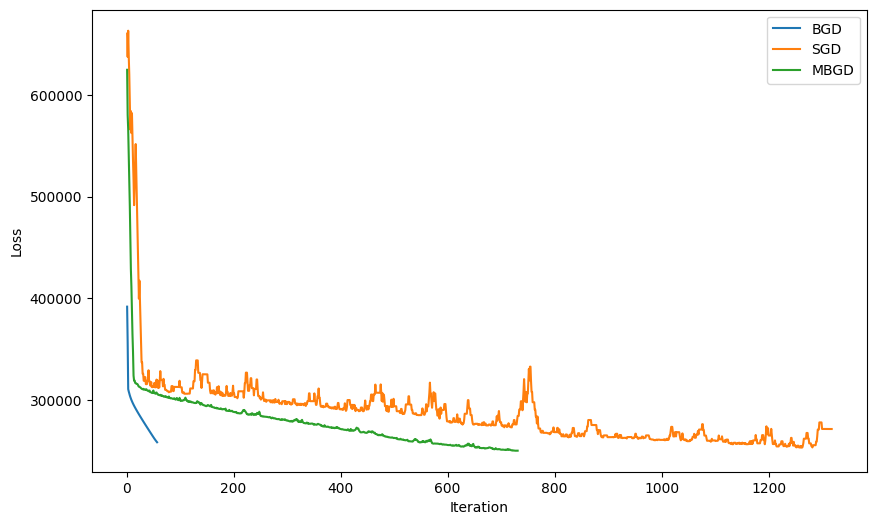

In [ ]:
def load_data(features_file, target_file):
    features = np.loadtxt(features_file, delimiter=',')
    target = np.loadtxt(target_file)
    return features, target

def compute_gradient(w, b, x, y, C):
    n = len(x)
    grad_w = np.zeros_like(w)
    grad_b = 0
    for i in range(n):
        if y[i] * (np.dot(w, x[i]) + b) < 1:
            grad_w += -y[i] * x[i]
            grad_b += -y[i]
    grad_w = w + C * grad_w
    grad_b = C * grad_b
    return grad_w, grad_b

def compute_loss(w, b, x, y, C):
    loss = 0.5 * np.dot(w, w)
    for i in range(len(x)):
        loss += C * max(0, 1 - y[i] * (np.dot(w, x[i]) + b))
    return loss

def gradient_descent(x, y, C, eta, epsilon, batch_size):
    n, d = x.shape
    w = np.zeros(d)
    b = 0
    loss_array = []
    iters_array = []

    #test
    #print(f"initial loss = {compute_loss(w, b, x, y, C)}")

    #random shuffle
    if batch_size < n:
        indices = np.random.permutation(n)
        x = x[indices]
        y = y[indices]

    k = 0

    for t in range(1, 10000):
        start = k * batch_size
        end = min((k + 1) * batch_size, n)
        x_batch = x[start:end]
        y_batch = y[start:end]

        #update gradients
        grad_w, grad_b = compute_gradient(w, b, x_batch, y_batch, C)
        w -= eta * grad_w
        b -= eta * grad_b

        #loss calculation
        loss = compute_loss(w, b, x, y, C)
        loss_array.append(loss)
        iters_array.append(t)

        #update k
        k = (k + 1) % (n // batch_size)

        #convergence criteria
        if t > 1:
            prev_loss_change = abs(loss_array[-2] - loss_array[-1]) / loss_array[-2] * 100

            #BGD
            if batch_size == n:
                if prev_loss_change < epsilon:
                    break

            #SGD and MBGD
            else:
                loss_change = 0.5 * prev_loss_change + 0.5 * (0 if t == 2 else loss_change)
                if loss_change < epsilon:
                    break

    return loss_array, iters_array

features, target = load_data(features_data, target_data)
C = 100

#BGD
init_time = time.time()
bgd_loss, bgd_iters = gradient_descent(features, target, C, eta=3e-7, epsilon=0.25, batch_size=len(features))
bgd_time = time.time() - init_time
print(f"BGD ----> {len(bgd_iters)} iters in {bgd_time:.2f}s")

#SGD
init_time = time.time()
sgd_loss, sgd_iters = gradient_descent(features, target, C, eta=0.0001, epsilon=0.001, batch_size=1)
sgd_time = time.time() - init_time
print(f"SGD ----> {len(sgd_iters)} iters in {sgd_time:.2f}s")

#MBGD
init_time = time.time()
mbgd_loss, mbgd_iters = gradient_descent(features, target, C, eta=1e-5, epsilon=0.01, batch_size=20)
mbgd_time = time.time() - init_time
print(f"MBGD ----> {len(mbgd_iters)} iters in {mbgd_time:.2f}s")

plt.figure(figsize=(10, 6))
plt.plot(bgd_iters, bgd_loss, label='BGD')
plt.plot(sgd_iters, sgd_loss, label='SGD')
plt.plot(mbgd_iters, mbgd_loss, label='MBGD')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()